In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import wandb

In [2]:
# Load the CSV data into a pandas DataFrame
df=pd.read_csv('/Users/pixcy/Documents/Python Course/Landslide Assignment/bhutan_landslide_data.csv');

In [3]:
#Display the first few rows of the dataframe
print(df.head())
print(df.tail())

   FID   Type  Code  Lithology  Altitude  Slope  Total curvature  Aspect  \
0    0  slide     1          1         1      2                1       7   
1    1  slide     1          1         1      3                1       4   
2    2  slide     1          1         1      2                3       7   
3    3  slide     1          1         1      3                1      10   
4    4  slide     1          1         1      3                1      10   

   Distance to road  Distance to stream  Slope length  TWI  STI  
0                 1                   5             2    4    1  
1                 2                   2             2    5    1  
2                 1                   1             1    3    0  
3                 1                   2             2    4    0  
4                 1                   4             3    5    0  
       FID   Type  Code  Lithology  Altitude  Slope  Total curvature  Aspect  \
1216  1216  slide     1          5         4      2                

In [4]:
#Display theData types and null value information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FID                 1221 non-null   int64 
 1   Type                1221 non-null   object
 2   Code                1221 non-null   int64 
 3   Lithology           1221 non-null   int64 
 4   Altitude            1221 non-null   int64 
 5   Slope               1221 non-null   int64 
 6   Total curvature     1221 non-null   int64 
 7   Aspect              1221 non-null   int64 
 8   Distance to road    1221 non-null   int64 
 9   Distance to stream  1221 non-null   int64 
 10  Slope length        1221 non-null   int64 
 11  TWI                 1221 non-null   int64 
 12  STI                 1221 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 124.1+ KB
None


In [5]:
#check for missing values
print(df.isnull().sum())

FID                   0
Type                  0
Code                  0
Lithology             0
Altitude              0
Slope                 0
Total curvature       0
Aspect                0
Distance to road      0
Distance to stream    0
Slope length          0
TWI                   0
STI                   0
dtype: int64


In [6]:
# Display the summary statistics of the numerical columns
print(df.describe())

               FID         Code    Lithology     Altitude        Slope  \
count  1221.000000  1221.000000  1221.000000  1221.000000  1221.000000   
mean    610.000000     0.779689     5.764128     2.974611     2.756757   
std     352.616647     0.414626     2.868150     1.190197     0.906605   
min       0.000000     0.000000     1.000000     1.000000     0.000000   
25%     305.000000     1.000000     4.000000     2.000000     2.000000   
50%     610.000000     1.000000     8.000000     3.000000     3.000000   
75%     915.000000     1.000000     8.000000     4.000000     3.000000   
max    1220.000000     1.000000     8.000000     6.000000     5.000000   

       Total curvature       Aspect  Distance to road  Distance to stream  \
count      1221.000000  1221.000000       1221.000000         1221.000000   
mean          1.918100     6.017199          2.189189            2.520885   
std           0.953772     2.289076          1.409365            1.250809   
min           1.000000   

<AxesSubplot:xlabel='Type', ylabel='count'>

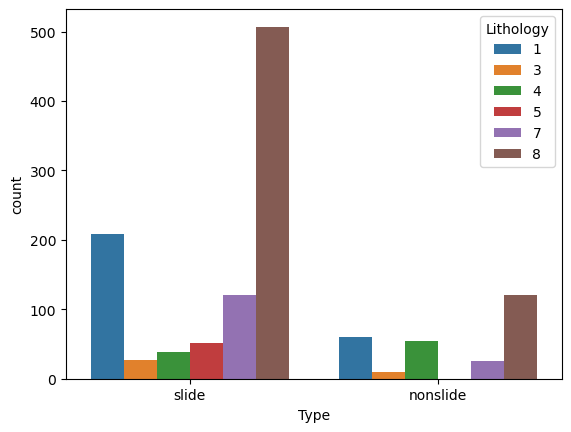

In [7]:
#ChecK Type agaisnt lithology
sns.countplot(x="Type", hue="Lithology", data=df)

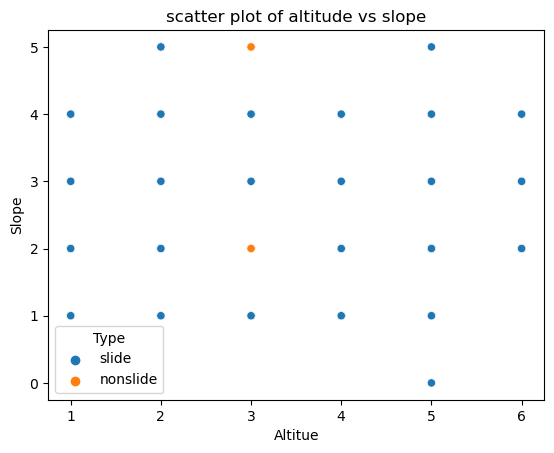

In [8]:
#Scatter Plot in Seaborn
sns.scatterplot(x="Altitude", y="Slope", hue="Type", data=df)

#set Plot title and axis labels
plt.title('scatter plot of altitude vs slope')
plt.xlabel('Altitue')
plt.ylabel('Slope')

#show the plot
plt.show()

In [9]:
# List of variables to check for outliers
variables = ['Altitude', 'Slope', 'Total curvature', 'Aspect', 'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI']
#  Loop through each variable and check for outliers using IQR method
for var in variables:
    # Calculate the IQR (interquartile range) for the variable
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers detection
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Identify the outliers in the variable
    outliers = df[(df[var] > upper_bound) | (df[var] < lower_bound)]

    # Print the number of outliers detected for the variable
    print(f"Variable: {var}, Number of outliers: {len(outliers)}")

Variable: Altitude, Number of outliers: 0
Variable: Slope, Number of outliers: 15
Variable: Total curvature, Number of outliers: 0
Variable: Aspect, Number of outliers: 0
Variable: Distance to road, Number of outliers: 0
Variable: Distance to stream, Number of outliers: 0
Variable: Slope length, Number of outliers: 53
Variable: TWI, Number of outliers: 0
Variable: STI, Number of outliers: 18


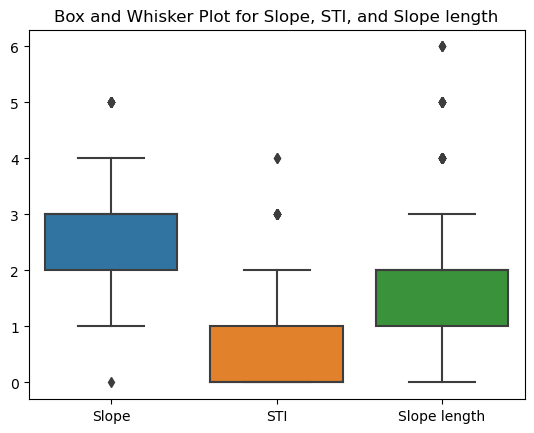

In [10]:
# Create a box and whisker plot for 'Slope', 'STI', and 'Slope Length'
sns.boxplot(data=df[['Slope', 'STI', 'Slope length']])
plt.title("Box and Whisker Plot for Slope, STI, and Slope length")
plt.show()

# Define the lower and upper bounds for outlier detection
lower_bound = df['Slope'].quantile(0.25) - 1.5 * (df['Slope'].quantile(0.75) - df['Slope'].quantile(0.25))
upper_bound = df['Slope'].quantile(0.75) + 1.5 * (df['Slope'].quantile(0.75) - df['Slope'].quantile(0.25))

# Create boolean masks to filter the rows of the dataframe
mask_slope = (df['Slope'] >= lower_bound) & (df['Slope'] <= upper_bound)
mask_sti = (df['STI'] >= lower_bound) & (df['STI'] <= upper_bound)
mask_slope_length = (df['Slope length'] >= lower_bound) & (df['Slope length'] <= upper_bound)

# Create a new dataframe without the outliers
df_new = df[mask_slope & mask_sti & mask_slope_length]

In [11]:
#Create a correlation matrix
correlation_matrix=df_new.corr()

#Display Correlation Matrix
print(correlation_matrix)

                         FID      Code  Lithology  Altitude     Slope  \
FID                 1.000000 -0.011636   0.567677  0.682792  0.110266   
Code               -0.011636  1.000000   0.077874  0.152314 -0.010360   
Lithology           0.567677  0.077874   1.000000  0.530955  0.098215   
Altitude            0.682792  0.152314   0.530955  1.000000  0.097222   
Slope               0.110266 -0.010360   0.098215  0.097222  1.000000   
Total curvature     0.021788  0.077422   0.029335  0.054919 -0.044939   
Aspect             -0.019512 -0.017743   0.029058  0.025694 -0.011979   
Distance to road    0.307234  0.461643   0.183912  0.490047  0.071599   
Distance to stream -0.069589 -0.082171  -0.055417  0.168835 -0.028238   
Slope length        0.047614 -0.017006   0.049513 -0.004352  0.471924   
TWI                -0.010742  0.015768   0.017153 -0.081041 -0.011043   
STI                 0.027965 -0.032103   0.015896 -0.035654 -0.070571   

                    Total curvature    Aspect  Dis

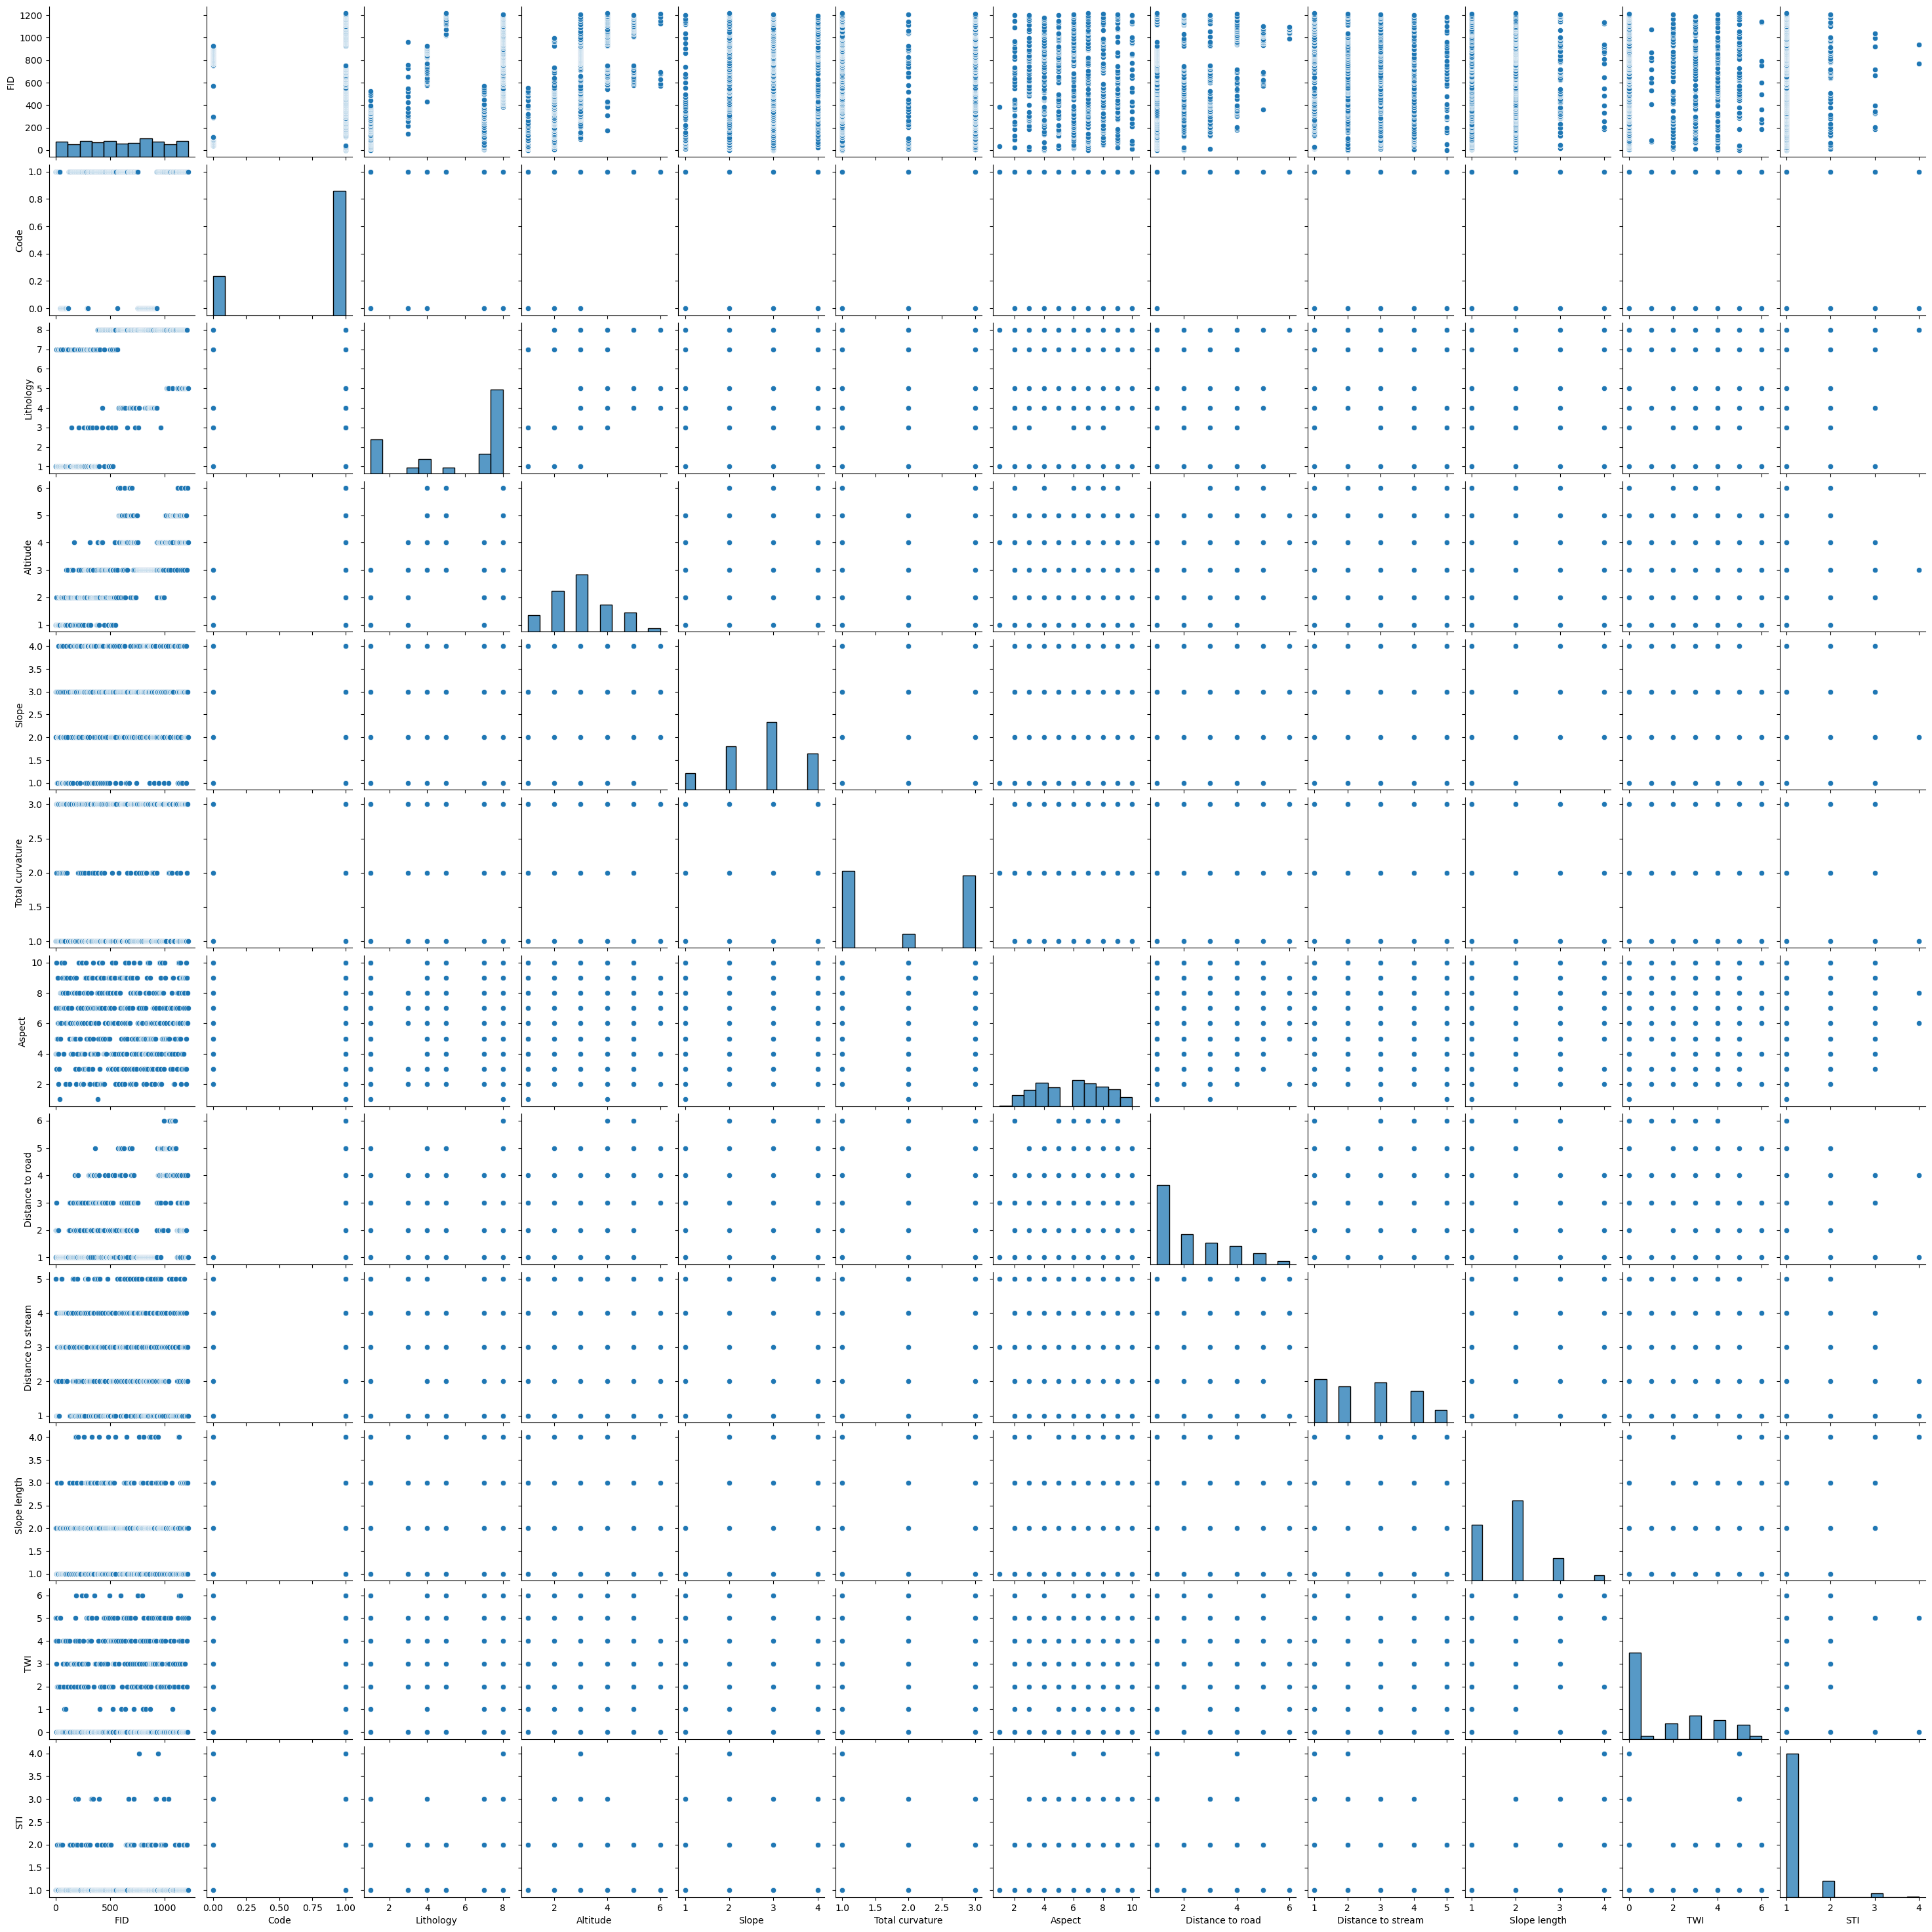

In [12]:
# Create scatterplots between pairs of predictor variables
sns.pairplot(df_new)
plt.show()

In [13]:
# Drop the 'FID' and 'Type' column
df_final = df_new.drop('FID', axis=1)
df_final = df_new.drop('Type', axis=1)

# Display the dataframe after dropping the 'FID' column
print("\nDataframe after dropping 'FID' column:")
print(df_final)


Dataframe after dropping 'FID' column:
       FID  Code  Lithology  Altitude  Slope  Total curvature  Aspect  \
0        0     1          1         1      2                1       7   
1        1     1          1         1      3                1       4   
7        7     1          7         2      3                1       4   
8        8     1          7         2      3                3       3   
9        9     1          7         1      3                2      10   
...    ...   ...        ...       ...    ...              ...     ...   
1204  1204     1          5         3      3                2       6   
1206  1206     1          8         4      2                2       9   
1209  1209     1          5         4      3                1       6   
1212  1212     1          5         6      2                3       8   
1216  1216     1          5         4      2                1       7   

      Distance to road  Distance to stream  Slope length  TWI  STI  
0             

In [14]:
# Convert categorical variables to binary numeric using one-hot encoding
df_final = pd.get_dummies(df_final, drop_first=True)

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split

X = df_final.drop('Code', axis=1)
y = df_final['Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create and train logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on validation set
y_pred_val = logreg.predict(X_val)

#Initializing for weights and bias
wandb.login()
wandb.init(project='Landslide-new',entity='pixcy27', name='Logistic Regression')

# Evaluate the model on validation set
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy on validation set:", accuracy)

wandb.log({'Accuracy':accuracy})


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
wandb: Currently logged in as: pixcy27 (pixcy). Use `wandb login --relogin` to force relogin
wandb: Currently logged in as: pixcy27. Use `wandb login --relogin` to force relogin


Accuracy on validation set: 0.782608695652174


In [17]:
#Create Random forest  model

# Separating the target variable from the features
X = df_final.drop('Code', axis=1)
y = df_final['Code']

# Splitting the dataset into training, validation, and testing sets in a ratio of 70:10:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initializing the Random Forest Classifier with some hyperparameters
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training set
rfc.fit(X_train, y_train)

#Initializing for weights and bias
wandb.init(project='Landslide-new',entity='pixcy27', name='Random Forest')

# Making predictions on the validation set
y_pred = rfc.predict(X_test)

# Evaluating the model's performance on the validation set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

wandb.log({'Accuracy':accuracy})


Accuracy,▁
Accuracy,1.0


Accuracy: 0.9780701754385965


In [18]:
# Separating the target variable from the features
X = df_final.drop('Code', axis=1)
y = df_final['Code']

# Splitting the dataset into training, validation, and testing sets in a ratio of 70:10:20
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=42, stratify=y_train_val)

# Converting the training, validation, and testing data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting the hyperparameters for the XGBoost model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(df['Code'].unique()) # number of unique labels in the target variable
}

# Training the XGBoost model on the training set and evaluating on the validation set
num_rounds = 100
watchlist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_rounds, watchlist, early_stopping_rounds=10, verbose_eval=10)

#Initializing for weights and bias
wandb.init(project='Landslide-new',entity='pixcy27', name='Xboost')

# Making predictions on the test set
y_test_pred = model.predict(dtest)

# Evaluating the model's performance on the test set
test_acc = accuracy_score(y_test, y_test_pred)
print('Test accuracy:', test_acc)

wandb.log({'Accuracy':test_acc})



[0]	train-mlogloss:0.61172	eval-mlogloss:0.60607
[10]	train-mlogloss:0.24989	eval-mlogloss:0.22024
[20]	train-mlogloss:0.13901	eval-mlogloss:0.11261
[30]	train-mlogloss:0.08908	eval-mlogloss:0.07096
[40]	train-mlogloss:0.05619	eval-mlogloss:0.04621
[50]	train-mlogloss:0.03769	eval-mlogloss:0.03577
[60]	train-mlogloss:0.02720	eval-mlogloss:0.02824
[70]	train-mlogloss:0.02010	eval-mlogloss:0.02369
[80]	train-mlogloss:0.01624	eval-mlogloss:0.02304
[83]	train-mlogloss:0.01534	eval-mlogloss:0.02319


/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Accuracy,▁
Accuracy,0.97807


Test accuracy: 1.0
